In [397]:
import random
import time
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, Add, Activation, Cropping2D, Concatenate
import keras.backend as K

%matplotlib inline

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

1


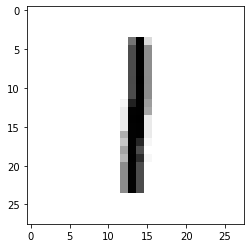

In [3]:
# Show an example image from the training data along with its label
index = int(random.random()*len(x_train))
print(y_train[index])
plt.imshow(x_train[index], cmap='Greys')

In [4]:
# 60k training examples, 28 x 28 pixel images
print(x_train.shape)
# 10k testing examples
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
# Reshape, only one layer (grayscale)
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [6]:
# Normalize
x_train /= 255.0
x_test /= 255.0

In [63]:
# Create model - convolution, pooling, flatten, relu, dropout, softmax
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [64]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 176us/step - loss: 0.1975 - accuracy: 0.9414
Epoch 2/5
60000/60000 [==============================] - 10s 171us/step - loss: 0.0827 - accuracy: 0.9743
Epoch 3/5
60000/60000 [==============================] - 10s 174us/step - loss: 0.0551 - accuracy: 0.9826
Epoch 4/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0413 - accuracy: 0.9870
Epoch 5/5
60000/60000 [==============================] - 10s 165us/step - loss: 0.0327 - accuracy: 0.9894


In [65]:
# Pretty much the same despite having twice as many neurons in the second to last layer
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 74us/step


[0.053561915939213944, 0.9830999970436096]

Prediction: 2
Actual: 2


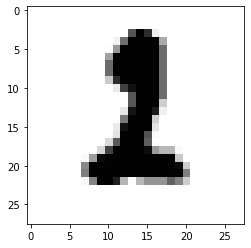

In [139]:
# Show an example image from the training data along with its label
# and its predicted label from the model
index = int(random.random()*len(x_test))
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print('Prediction: {}'.format(pred.argmax()))
print('Actual: {}'.format(y_test[index]))
plt.imshow(x_test[index].reshape(28, 28), cmap='Greys')
# Looks like a 1 to me...

In [13]:
# Verify CUDA installation and compare GPU training speed to CPU
with tf.device('/CPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
with tf.device('/GPU:0'):
    model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=1)
# I don't have a great GPU, but it's better than nothing.

Epoch 1/1
60000/60000 [==============================] - 19s 315us/step - loss: 0.0252 - accuracy: 0.9912
Epoch 1/1
60000/60000 [==============================] - 10s 160us/step - loss: 0.0234 - accuracy: 0.9922


In [153]:
#Try some different architectures
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model2.add(Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(64, activation=tf.nn.relu))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation=tf.nn.softmax))

In [154]:
model2.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model2.fit(x=x_train, y=y_train, epochs=5, batch_size=512)

Epoch 1/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.5017 - accuracy: 0.8469
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1613 - accuracy: 0.9537
Epoch 3/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1194 - accuracy: 0.9651
Epoch 4/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0991 - accuracy: 0.9695
Epoch 5/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0839 - accuracy: 0.9757


In [155]:
# Barely better
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 142us/step


[0.03603210315018077, 0.9883999824523926]

In [156]:
model3 = Sequential()
model3.add(Dropout(0.1))
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, padding='same', activation=tf.nn.relu))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(64, activation=tf.nn.relu))
model3.add(Dropout(0.25))
model3.add(Dense(10, activation=tf.nn.softmax))

In [159]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model3.fit(x=x_train, y=y_train, epochs=10, batch_size=512)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.0795 - accuracy: 0.9755
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0707 - accuracy: 0.9783
Epoch 3/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0639 - accuracy: 0.9800
Epoch 4/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0578 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0532 - accuracy: 0.9829
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0469 - accuracy: 0.9853
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0440 - accuracy: 0.9864
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0413 - accuracy: 0.9868
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0390 - accuracy: 0.9871
Epoch 10/10
60000/60000 [==============================

In [160]:
#This one was much faster, and slightly better.
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 106us/step


[0.028460302224976475, 0.9907000064849854]

In [100]:
def ResNetUnit(x, filters=64, size=3, activation='relu', padding='same'):
    y = Conv2D(filters, size, activation=activation, padding=padding)(x)
    y = BatchNormalization()(y)
    y = Conv2D(filters, size, activation=None, padding=padding)(y)
    y = BatchNormalization()(y)
    if padding=='same':
        y = Add()([x, y])
    else:
        x = Cropping2D(size-1)(x)
        y = Add()([x, y])
    y = Activation(activation)(y)
    return y

In [15]:
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = ResNetUnit(x)
x = ResNetUnit(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)

model4 = keras.Model(inputs, outputs)

In [16]:
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model4.fit(x=x_train, y=y_train, batch_size=512, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 20s 327us/step - loss: 0.2691 - accuracy: 0.9251
Epoch 2/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0457 - accuracy: 0.9862
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0304 - accuracy: 0.9906
Epoch 4/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0251 - accuracy: 0.9922
Epoch 5/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0204 - accuracy: 0.9937
Epoch 6/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0157 - accuracy: 0.9949
Epoch 7/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0118 - accuracy: 0.9964
Epoch 8/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.0102 - accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================] - 19s 310us/step - loss: 0.0088 - accuracy: 0.9972
Epoch 10/10
60000/60000 [============

In [37]:
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 207us/step


[0.024909546506872084, 0.9932000041007996]

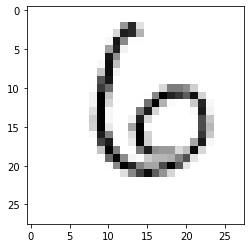

In [22]:
plt.imshow(x_test[100].reshape(28,28), cmap='Greys')

In [41]:
vals = []
for i in range(10000):
    vals.append([y_test[i], model4.predict(x_test[i].reshape(1,28,28,1)).argmax()])

In [44]:
mismatch = []
for i in range(10000):
    if vals[i][0] != vals[i][1]:
        mismatch.append([i, vals[i][0], vals[i][1]])

In [45]:
mismatch

[[115, 4, 9],
 [340, 5, 3],
 [449, 3, 5],
 [582, 8, 3],
 [684, 7, 2],
 [740, 4, 9],
 [846, 7, 9],
 [947, 8, 9],
 [1014, 6, 5],
 [1039, 7, 1],
 [1242, 4, 9],
 [1260, 7, 1],
 [1393, 5, 3],
 [1459, 2, 3],
 [1500, 7, 3],
 [1522, 7, 9],
 [1737, 5, 3],
 [1878, 8, 3],
 [1901, 9, 4],
 [2070, 7, 9],
 [2130, 4, 9],
 [2182, 1, 3],
 [2293, 9, 4],
 [2447, 4, 9],
 [2454, 6, 5],
 [2597, 5, 3],
 [2654, 6, 1],
 [2771, 4, 9],
 [2896, 8, 0],
 [2939, 9, 5],
 [2953, 3, 5],
 [2959, 2, 3],
 [2995, 6, 5],
 [3073, 1, 2],
 [3225, 7, 9],
 [3422, 6, 0],
 [3441, 7, 2],
 [3520, 6, 4],
 [3534, 4, 8],
 [3767, 7, 2],
 [3906, 1, 3],
 [3941, 4, 6],
 [4199, 7, 9],
 [4382, 4, 9],
 [4536, 6, 5],
 [4571, 6, 8],
 [4783, 4, 9],
 [4860, 4, 9],
 [4911, 4, 9],
 [5165, 0, 6],
 [5201, 4, 9],
 [5936, 4, 9],
 [5937, 5, 3],
 [5981, 5, 9],
 [5997, 5, 9],
 [6571, 9, 5],
 [6576, 7, 1],
 [6597, 0, 3],
 [6651, 0, 6],
 [6783, 1, 6],
 [7902, 7, 9],
 [8061, 4, 9],
 [8316, 7, 2],
 [8527, 4, 9],
 [9505, 7, 2],
 [9664, 2, 7],
 [9729, 5, 6],
 [9

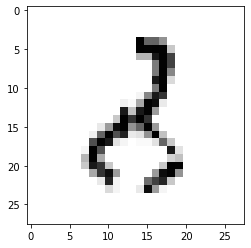

In [49]:
# wtf is this? 
plt.imshow(x_test[582].reshape(28,28), cmap='Greys')

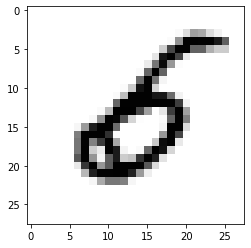

In [61]:
# I swear this is a 6.
plt.imshow(x_test[9729].reshape(28,28), cmap='Greys')

In [400]:
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Dropout(0.1)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(2)(x)
x = ResNetUnit(x)
x = ResNetUnit(x)
x = Conv2D(64, 3, activation='relu')(x)
x = Dropout(0.1)(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(10, activation='softmax')(x)

model5 = keras.Model(inputs, outputs)

In [63]:
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model5.fit(x_train, y_train, batch_size=1000, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 26s 442us/step - loss: 0.7608 - accuracy: 0.7875
Epoch 2/10
60000/60000 [==============================] - 24s 403us/step - loss: 0.0853 - accuracy: 0.9728
Epoch 3/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0566 - accuracy: 0.9827
Epoch 4/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0422 - accuracy: 0.9868
Epoch 5/10
60000/60000 [==============================] - 24s 406us/step - loss: 0.0337 - accuracy: 0.9898
Epoch 6/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0282 - accuracy: 0.9911
Epoch 7/10
60000/60000 [==============================] - 24s 405us/step - loss: 0.0242 - accuracy: 0.9922
Epoch 8/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0218 - accuracy: 0.9932
Epoch 9/10
60000/60000 [==============================] - 24s 404us/step - loss: 0.0202 - accuracy: 0.9934
Epoch 10/10
60000/60000 [============

In [64]:
model5.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 249us/step


[0.020051686681550926, 0.9939000010490417]

In [404]:
# ~20 layers deep?
inputs = keras.Input(shape=input_shape)
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
for _ in range(8):
    x = ResNetUnit(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

model6 = keras.Model(inputs, outputs)

In [19]:
model6.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model6.fit(x_train, y_train, batch_size=1000, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 54s 899us/step - loss: 0.9550 - accuracy: 0.8152
Epoch 2/30
60000/60000 [==============================] - 51s 850us/step - loss: 0.0664 - accuracy: 0.9792
Epoch 3/30
60000/60000 [==============================] - 51s 850us/step - loss: 0.0427 - accuracy: 0.9868
Epoch 4/30
60000/60000 [==============================] - 51s 851us/step - loss: 0.0314 - accuracy: 0.9903
Epoch 5/30
60000/60000 [==============================] - 51s 852us/step - loss: 0.0225 - accuracy: 0.9931
Epoch 6/30
60000/60000 [==============================] - 51s 852us/step - loss: 0.0191 - accuracy: 0.9941
Epoch 7/30
60000/60000 [==============================] - 51s 851us/step - loss: 0.0153 - accuracy: 0.9949
Epoch 8/30
60000/60000 [==============================] - 51s 851us/step - loss: 0.0129 - accuracy: 0.9960
Epoch 9/30
60000/60000 [==============================] - 51s 851us/step - loss: 0.0145 - accuracy: 0.9952
Epoch 10/30
60000/60000 [============

In [22]:
model6.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 499us/step


[0.026167441274324993, 0.992900013923645]

In [31]:
# Create new data to improve training
# Assume image is 28 x 28 x 1 as it is in this dataset...
# Only integral shifts
def translate(image, dx, dy):
    res = np.copy(image)
    for i in range(28):
        for j in range(28):
            if i-dx < 0 or i-dx >= 28 or j-dy < 0 or j-dy >= 28:
                res[i,j,0] = 0.0
            else:
                res[i,j,0] = image[i-dx,j-dy,0]
    return image

def rotate(image, theta):
    return ndimage.rotate(image, theta, reshape=False)

In [32]:
# Create augmented training set
extra_train_x = []
extra_train_y = []
# Copy over
for image in x_train:
    extra_train_x.append(image)
for label in y_train:
    extra_train_y.append(label)
# Up to 300k total images, shifted +/- 1 pixel and rotated +/-30 degrees
for _ in range(4):
    for (image, label) in zip(x_train, y_train):
        trans_image = translate(rotate(image, -30+60*random.random()), -1+int(3*random.random()), -1+int(3*random.random()))
        extra_train_x.append(trans_image)
        extra_train_y.append(label)

In [48]:
extra_train_x = np.asarray(extra_train_x).astype('float32')
extra_train_y = np.asarray(extra_train_y).astype('float32')

In [62]:
# Convert image values so there aren't any negatives...
fastconv = Sequential()
fastconv.add(Activation('relu'))
extra_train_x = fastconv.predict(extra_train_x)

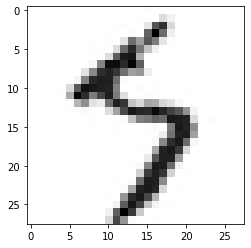

In [63]:
plt.imshow(extra_train_x[2*60000+0].reshape(28,28), cmap='Greys')

In [70]:
model6.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model6.fit(extra_train_x, extra_train_y, batch_size=1000, epochs=100)

Epoch 1/100
300000/300000 [==============================] - 258s 861us/step - loss: 0.2514 - accuracy: 0.9365
Epoch 2/100
300000/300000 [==============================] - 256s 854us/step - loss: 0.0388 - accuracy: 0.9886
Epoch 3/100
300000/300000 [==============================] - 257s 857us/step - loss: 0.0271 - accuracy: 0.9919
Epoch 4/100
300000/300000 [==============================] - 257s 856us/step - loss: 0.0213 - accuracy: 0.9936
Epoch 5/100
300000/300000 [==============================] - 256s 854us/step - loss: 0.0179 - accuracy: 0.9945
Epoch 6/100
300000/300000 [==============================] - 256s 855us/step - loss: 0.0160 - accuracy: 0.9951
Epoch 7/100
300000/300000 [==============================] - 257s 855us/step - loss: 0.0162 - accuracy: 0.9950
Epoch 8/100
300000/300000 [==============================] - 270s 901us/step - loss: 0.0133 - accuracy: 0.9960
Epoch 9/100
300000/300000 [==============================] - 272s 906us/step - loss: 0.0135 - accuracy: 0.9960
E

In [71]:
model6.evaluate(x_test, y_test)

10000/10000 [==============================] - 5s 501us/step


[0.05039574176039329, 0.9943000078201294]

In [77]:
model7a = Sequential()
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(26,26,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(24,24,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(22,22,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(20,20,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(18,18,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(16,16,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(14,14,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(12,12,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(10,10,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(8,8,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(6,6,1)))
model7a.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(4,4,1)))
model7a.add(Flatten())
model7a.add(Dense(256, activation='relu'))
model7a.add(Dropout(0.5))
model7a.add(Dense(10, activation='softmax'))

In [78]:
model7a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model7a.fit(x_train, y_train, batch_size=200, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 41s 686us/step - loss: 0.2221 - accuracy: 0.9319
Epoch 2/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0675 - accuracy: 0.9807
Epoch 3/10
60000/60000 [==============================] - 40s 671us/step - loss: 0.0468 - accuracy: 0.9858
Epoch 4/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0375 - accuracy: 0.9890
Epoch 5/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0313 - accuracy: 0.9907
Epoch 6/10
60000/60000 [==============================] - 40s 669us/step - loss: 0.0282 - accuracy: 0.9913
Epoch 7/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0225 - accuracy: 0.9933
Epoch 8/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.0190 - accuracy: 0.9939
Epoch 9/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0213 - accuracy: 0.9933
Epoch 10/10
60000/60000 [============

In [79]:
model7a.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 327us/step


[0.025978392983453523, 0.991599977016449]

In [115]:
inputs = keras.Input(shape=input_shape)
x = ResNetUnit(inputs, 64, 3, padding='valid')
x = MaxPooling2D(2)(x)
x = ResNetUnit(x, 64, 3, padding='valid')
y = ResNetUnit(inputs, 32, 7, padding='valid')
y = MaxPooling2D(2)(y)
z = ResNetUnit(inputs, 16, 11, padding='valid')
#print(x.shape)
#print(y.shape)
#print(z.shape)
w = Concatenate()([x, y, z])
w = Flatten()(w)
w = Dense(512, activation='relu')(w)
w = Dropout(0.5)(w)
outputs = Dense(10, activation='softmax')(w)
model8 = keras.Model(inputs, outputs)

In [116]:
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model8.fit(x_train, y_train, batch_size=500, epochs=10)
model8.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 39s 646us/step - loss: 0.7570 - accuracy: 0.8684
Epoch 2/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0975 - accuracy: 0.9724
Epoch 3/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0658 - accuracy: 0.9810
Epoch 4/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0520 - accuracy: 0.9843
Epoch 5/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.0419 - accuracy: 0.9879
Epoch 6/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.0362 - accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.0344 - accuracy: 0.9900
Epoch 8/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.0308 - accuracy: 0.9908
Epoch 9/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.0282 - accuracy: 0.9915
Epoch 10/10
10000/10000 [============

[0.05592482680416167, 0.9847999811172485]

In [120]:
inputs = keras.Input(shape=(28,28,1))
x = ResNetUnit(inputs, 64, 3, padding='valid') # 24
x = ResNetUnit(x, 64, 3, padding='valid') # 20
x = ResNetUnit(x, 64, 3, padding='valid') # 16
x = ResNetUnit(x, 64, 3, padding='valid') # 12
x = ResNetUnit(x, 64, 3, padding='valid') # 8
x = ResNetUnit(x, 64, 3, padding='valid') # 4
y = ResNetUnit(inputs, 64, 7, padding='valid') # 16
y = ResNetUnit(y, 64, 7, padding='valid') # 4
z = ResNetUnit(inputs, 64, 11, padding='valid') # 8
z = ResNetUnit(z, 64, 3, padding='valid') # 4
print(x.shape, y.shape, z.shape)
w = Concatenate()([x, y, z])
w = Flatten()(w)
w = Dense(512, activation='relu')(w)
w = Dropout(0.5)(w)
outputs = Dense(10, activation='softmax')(w)
model9 = keras.Model(inputs, outputs)

(None, 4, 4, 64) (None, 4, 4, 64) (None, 4, 4, 64)


In [122]:
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model9.fit(x_train, y_train, batch_size=200, epochs=50)
model9.evaluate(x_test, y_test)

Epoch 1/50
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1386 - accuracy: 0.9617
Epoch 2/50
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0651 - accuracy: 0.9815
Epoch 3/50
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0485 - accuracy: 0.9863
Epoch 4/50
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0387 - accuracy: 0.9891
Epoch 5/50
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 6/50
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0315 - accuracy: 0.9911
Epoch 7/50
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 8/50
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0273 - accuracy: 0.9921
Epoch 9/50
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0226 - accuracy: 0.9933
Epoch 10/50
60000/60000 [=====================

[0.05033699312680069, 0.9932000041007996]

In [123]:
#99.48% is still my best. Oh well.
# Just curious what happens on data well outside the domain of applicability
(train_x_c10, train_y_c10), (test_x_c10, test_y_c10) = tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 345s 2us/step


9059
[0]


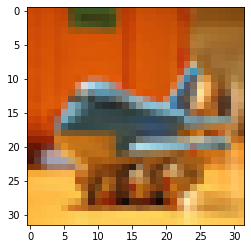

In [199]:
# 9059
ind = int(random.random()*50000)
print(ind)
print(train_y_c10[ind])
plt.imshow(train_x_c10[ind])

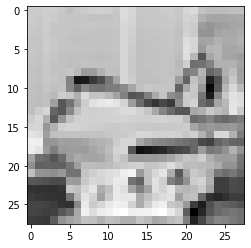

In [205]:
croppedR = train_x_c10[ind][2:30,2:30,0]
croppedG = train_x_c10[ind][2:30,2:30,1]
croppedB = train_x_c10[ind][2:30,2:30,2]
plt.imshow(croppedG, cmap='Greys')

In [201]:
# Pretty much always classifies with 1 in the predicted class and 0 everywhere else.
# This is an interesting example in that all three color channels have different predictions.
print(np.round(model9.predict(croppedR.reshape(1,28,28,1)), 2))
print(np.round(model9.predict(croppedG.reshape(1,28,28,1)), 2))
print(np.round(model9.predict(croppedB.reshape(1,28,28,1)), 2))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [247]:
# Let's try adding a new non-digit class.
train_x_cc = np.asarray([train_x_c10[i][2:30,2:30,1] for i in range(50000)]).reshape(50000, 28, 28, 1).astype('float32')
train_x_cc /= 255.0
train_y_cc = np.asarray([10 for i in range(50000)])

In [248]:
train_aug_x = np.concatenate((x_train, train_x_cc))
print(train_aug_x.shape)
train_aug_y = np.concatenate((y_train, train_y_cc))
print(train_aug_y.shape)

(110000, 28, 28, 1)
(110000,)


In [249]:
inputs = keras.Input(shape=(28,28,1))
x = Conv2D(32, 3, activation='relu', input_shape=input_shape)(inputs)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = ResNetUnit(x)
x = ResNetUnit(x)
x = ResNetUnit(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(11, activation='softmax')(x)
model10 = keras.Model(inputs, outputs)

In [250]:
model10.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model10.fit(train_aug_x, train_aug_y, batch_size=200, epochs=10)

Epoch 1/10
110000/110000 [==============================] - 50s 458us/step - loss: 0.2913 - accuracy: 0.9264
Epoch 2/10
110000/110000 [==============================] - 49s 446us/step - loss: 0.0645 - accuracy: 0.9820
Epoch 3/10
110000/110000 [==============================] - 49s 445us/step - loss: 0.0410 - accuracy: 0.9885
Epoch 4/10
110000/110000 [==============================] - 49s 445us/step - loss: 0.0310 - accuracy: 0.9915
Epoch 5/10
110000/110000 [==============================] - 49s 444us/step - loss: 0.0253 - accuracy: 0.9931
Epoch 6/10
110000/110000 [==============================] - 49s 444us/step - loss: 0.0227 - accuracy: 0.9937
Epoch 7/10
110000/110000 [==============================] - 49s 445us/step - loss: 0.0196 - accuracy: 0.9945
Epoch 8/10
110000/110000 [==============================] - 49s 445us/step - loss: 0.0193 - accuracy: 0.9946
Epoch 9/10
110000/110000 [==============================] - 49s 444us/step - loss: 0.0289 - accuracy: 0.9925
Epoch 10/10
110000/

In [251]:
test_x_cc = np.asarray([test_x_c10[i][2:30,2:30,1] for i in range(10000)]).reshape(10000, 28, 28, 1).astype('float32')
test_x_cc /= 255.0
test_y_cc = np.asarray([10 for i in range(10000)])
test_aug_x = np.concatenate((x_test, test_x_cc))
test_aug_y = np.concatenate((y_test, test_y_cc))

In [252]:
# 99.61%, not bad!
model10.evaluate(test_aug_x, test_aug_y)

20000/20000 [==============================] - 5s 258us/step


[0.015903293651354396, 0.9961000084877014]

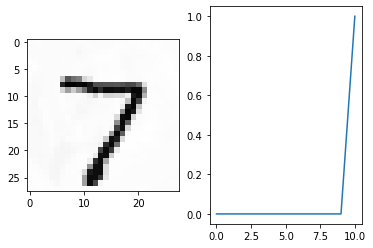

In [354]:
# Still doesn't do well on noisy digits.
testimg = 11*test_aug_x[0] + 1*test_aug_x[10000]
testimg = testimg/np.max(testimg)
pred = np.round(model10.predict(testimg.reshape(1,28,28,1)), 2).reshape(11)
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(testimg.reshape(28,28), cmap='Greys')
ax2.plot(pred)

In [307]:
# How does it do on just the digits? 99.22%
model10.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 248us/step


[0.03172433795391189, 0.9922000169754028]

In [361]:
# Cross-validation
x_combined = np.concatenate((x_train, x_test))
y_combined = np.concatenate((y_train, y_test))
num_folds = 10

In [386]:
# I feel like there should be a way to do this in the library to begin with.
# Turns out this is broken anyway.
def reset_weights(model):
    for layer in model.layers: 
        if isinstance(layer, tf.keras.Model):
            reset_weights(layer)
        continue
    for k, initializer in layer.__dict__.items():
        if "initializer" not in k:
            continue
        var = getattr(layer, k.replace("_initializer", ""))
        var.assign(initializer(var.shape, var.dtype))

In [402]:
def crossvalidate(model, x_data, y_data, folds, batch_size=200, epochs=20, seed=0):
    # Assume model hasn't been trained yet, because weight resetting doesn't work.
    np.random.seed(seed)
    model.save_weights('initial.h5')
    size = len(x_data)
    losses = []
    accuracies = []
    avgloss = 0
    avgacc = 0
    for i in range(folds):
        # reset_weights(model)
        model.load_weights('initial.h5')
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        start_index = int(size*i/folds)
        end_index = int(size*(i+1)/folds)
        print('Fold {}: {} - {}'.format(i, start_index, end_index))
        xtest = x_data[start_index:end_index]
        ytest = y_data[start_index:end_index]
        xtrain = np.concatenate((x_data[0:start_index], x_data[end_index:size]))
        ytrain = np.concatenate((y_data[0:start_index], y_data[end_index:size]))
        model.fit(xtrain, ytrain, batch_size=batch_size, epochs=epochs)
        scores = model.evaluate(xtest, ytest)
        losses.append(scores[0])
        accuracies.append(scores[1])
        print(scores[1])
        avgloss += scores[0]
        avgacc += scores[1]
    avgloss /= folds
    avgacc /= folds
    sstdev = 0
    for i in range(folds):
        sstdev += (accuracies[i] - avgacc)**2
    sstdev = (sstdev/(folds-1))**0.5
    print('Average accuracy with {}-fold cross-validation: {:.5f} \u00b1 {:.5f}'.format(folds, avgacc, sstdev))
    return (avgacc, losses, accuracies)

In [403]:
crossvalidate(model5, x_combined, y_combined, num_folds, batch_size=200, epochs=5)

Fold 0: 0 - 7000
Epoch 1/5
63000/63000 [==============================] - 28s 450us/step - loss: 0.0590 - accuracy: 0.9821
Epoch 2/5
63000/63000 [==============================] - 27s 429us/step - loss: 0.0327 - accuracy: 0.9901
Epoch 3/5
63000/63000 [==============================] - 27s 429us/step - loss: 0.0253 - accuracy: 0.9922
Epoch 4/5
63000/63000 [==============================] - 27s 429us/step - loss: 0.0200 - accuracy: 0.9939
Epoch 5/5
7000/7000 [==============================] - 2s 238us/step
0.9932857155799866
Fold 1: 7000 - 14000
Epoch 1/5
63000/63000 [==============================] - 28s 449us/step - loss: 0.0569 - accuracy: 0.9823
Epoch 2/5
63000/63000 [==============================] - 27s 428us/step - loss: 0.0342 - accuracy: 0.9899
Epoch 3/5
63000/63000 [==============================] - 27s 428us/step - loss: 0.0243 - accuracy: 0.9925
Epoch 4/5
63000/63000 [==============================] - 27s 428us/step - loss: 0.0205 - accuracy: 0.9934
Epoch 5/5
7000/7000 [=====

(0.99118572473526,
 [0.022284390567602324,
  0.028721844047723738,
  0.026113871110586582,
  0.032248963425518015,
  0.03622376112113541,
  0.032728482961521616,
  0.029867032854069425,
  0.030832724159566817,
  0.04267810324100355,
  0.0172787805354206],
 [0.9932857155799866,
  0.9918571710586548,
  0.9917142987251282,
  0.9912857413291931,
  0.9901428818702698,
  0.9902856945991516,
  0.9892857074737549,
  0.9911428689956665,
  0.9884285926818848,
  0.9944285750389099])

In [405]:
crossvalidate(model6, x_combined, y_combined, num_folds, batch_size=200, epochs=25)

Fold 0: 0 - 7000
Epoch 1/25
63000/63000 [==============================] - 71s 1ms/step - loss: 0.3300 - accuracy: 0.9169
Epoch 2/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0591 - accuracy: 0.9829
Epoch 3/25
63000/63000 [==============================] - 65s 1ms/step - loss: 0.0445 - accuracy: 0.9867
Epoch 4/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0376 - accuracy: 0.9888
Epoch 5/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0340 - accuracy: 0.9901
Epoch 6/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0290 - accuracy: 0.9915
Epoch 7/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 8/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0255 - accuracy: 0.9925
Epoch 9/25
63000/63000 [==============================] - 66s 1ms/step - loss: 0.0225 - accuracy: 0.9932
Epoch 10/25
63000/63000 [=============

Epoch 24/25
63000/63000 [==============================] - 63s 993us/step - loss: 0.0122 - accuracy: 0.9964
Epoch 25/25
7000/7000 [==============================] - 4s 516us/step
0.9868571162223816
Fold 6: 42000 - 49000
Epoch 1/25
63000/63000 [==============================] - 64s 1ms/step - loss: 0.2814 - accuracy: 0.9279
Epoch 2/25
63000/63000 [==============================] - 60s 954us/step - loss: 0.0553 - accuracy: 0.9834
Epoch 3/25
63000/63000 [==============================] - 60s 960us/step - loss: 0.0434 - accuracy: 0.9871
Epoch 4/25
63000/63000 [==============================] - 61s 968us/step - loss: 0.0389 - accuracy: 0.9890
Epoch 5/25
63000/63000 [==============================] - 61s 975us/step - loss: 0.0311 - accuracy: 0.9912
Epoch 6/25
63000/63000 [==============================] - 61s 972us/step - loss: 0.0278 - accuracy: 0.9918
Epoch 7/25
63000/63000 [==============================] - 61s 972us/step - loss: 0.0243 - accuracy: 0.9930
Epoch 8/25
63000/63000 [=========

(0.9918142855167389,
 [0.026611555021946936,
  0.03853112976948855,
  0.04031716093335594,
  0.04902952241230378,
  0.03486207676862117,
  0.058693780943393774,
  0.03936152319094143,
  0.0413308753897864,
  0.03311518121353633,
  0.02597183254967016],
 [0.9937142729759216,
  0.9928571581840515,
  0.9898571372032166,
  0.9907143115997314,
  0.9927142858505249,
  0.9868571162223816,
  0.99314284324646,
  0.991428554058075,
  0.9922857284545898,
  0.9945714473724365])

In [406]:
# 10-fold cross-validation results on model6
# 99.45% maximum accuracy
# 99.18% +/- 0.22% mean/stdev accuracy